In [ ]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

Executing: /tmp/apt-key-gpghome.XqojJXStVv/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: 8 signatures not checked due to missing keys
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 k

In [ ]:
#python3-cairo from Ubuntu's reposity is linked with a different python version; we need to improvise
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 47 not upgraded.
After this operation, 257 kB disk space will be freed.
(Reading database ... 159400 files and directories currently installed.)
Removing python3-cairo:amd64 (1.16.2-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 lib

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1501: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from 'gi' (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


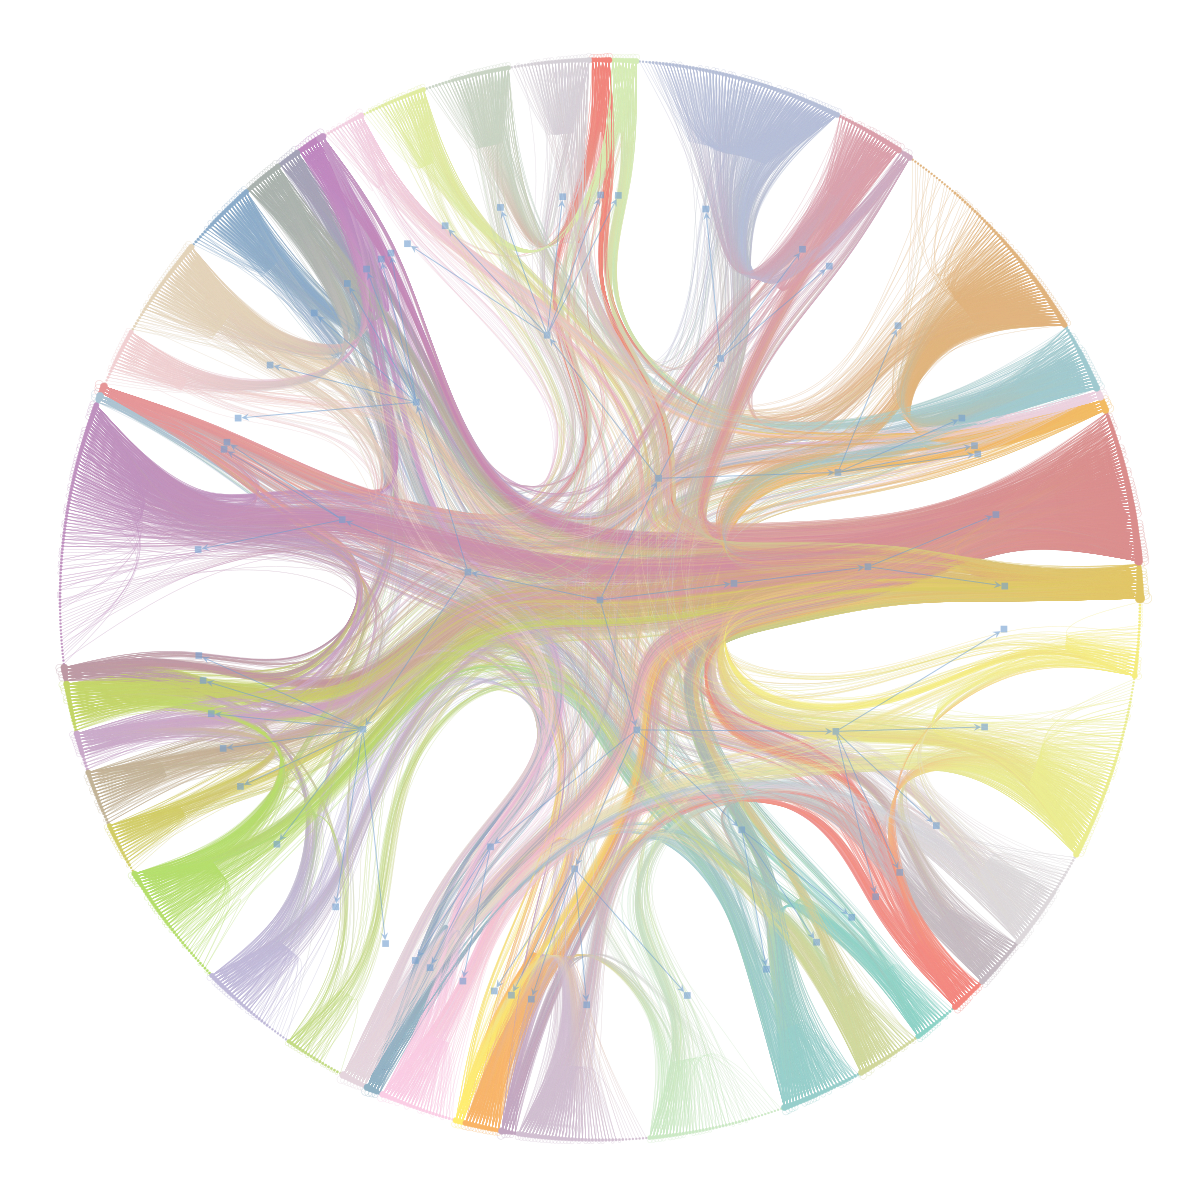

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc93acaf550, at 0x7fc915995b10>,
 <Graph object, directed, with 1070 vertices and 1069 edges, at 0x7fc9159b2350>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc9159b2350, at 0x7fc913b1da50>)

In [ ]:
from graph_tool.all import *
g = Graph(directed=False)

import pickle
with open('graphList.pkl', 'rb') as f:
  edges = pickle.load(f)

for edge in edges:
  g.add_edge(edge[0], edge[1])

state = minimize_nested_blockmodel_dl(g)
state.draw()

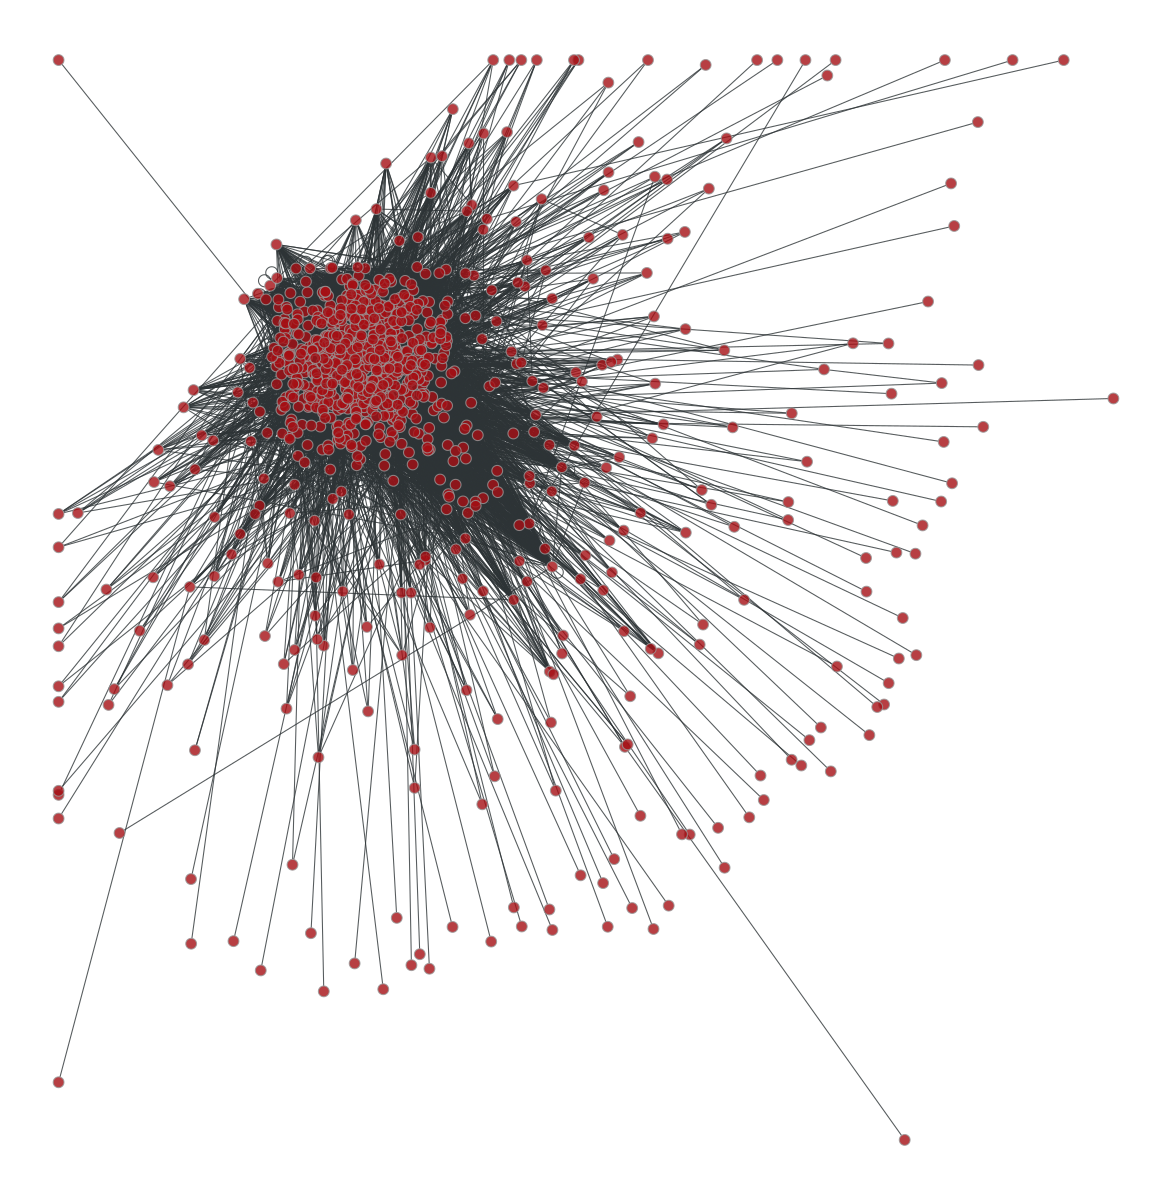

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc93acaf550, at 0x7fc9159e8a50>

In [ ]:
import graph_tool as gt
pos = gt.draw.fruchterman_reingold_layout(g, n_iter=1000)
gt.draw.graph_draw(g, pos=pos)

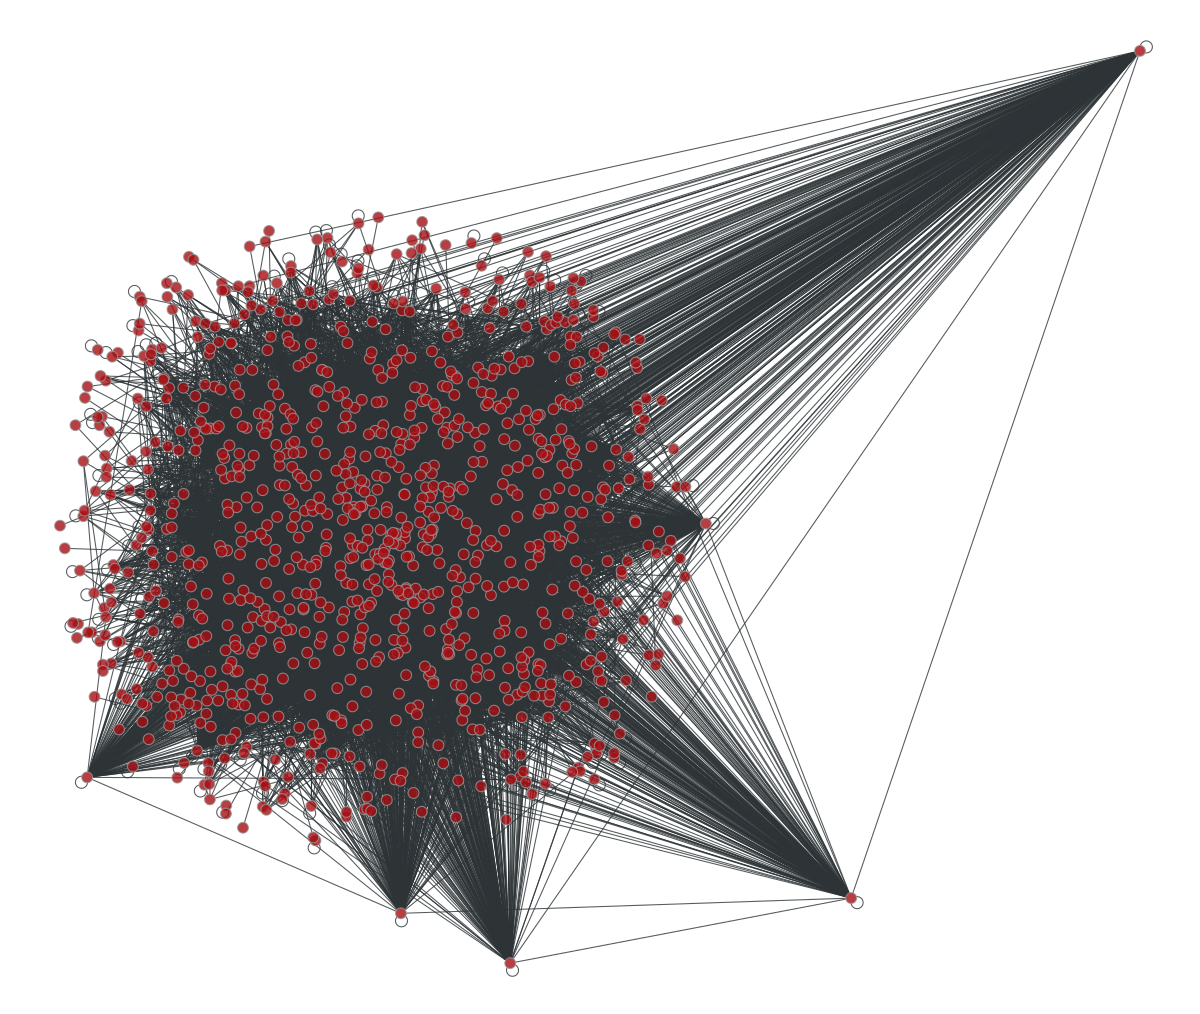

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc93acaf550, at 0x7fc913ac28d0>

In [ ]:
pos = gt.draw.arf_layout(g, max_iter=1)
gt.draw.graph_draw(g, pos=pos)